# **Sentimen Analisis Review APK Wondr by BNI**

- **Nama:** Dewi Safira Permata Sari
- **Email:** dwsafperri@gmail.com
- **ID Dicoding:** dwsafperri
- **ID Cohort:** MC009D5X0787

# **1. Data Preprocessing**

## **Import Library**

In [10]:
import pandas as pd  # Digunakan untuk manipulasi dan analisis data dalam bentuk tabel (dataframe)
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan terkait chained assignment pada dataframe
import numpy as np  # Digunakan untuk melakukan komputasi numerik dan manipulasi array
seed = 0
np.random.seed(seed)  # Mengatur nilai seed agar hasil random dapat direproduksi

import matplotlib.pyplot as plt  # Digunakan untuk membuat visualisasi data berupa grafik
import seaborn as sns  # Digunakan untuk visualisasi data statistik dengan tampilan yang lebih menarik

import datetime as dt  # Digunakan untuk memanipulasi data yang berhubungan dengan waktu dan tanggal
import re  # Modul untuk memproses teks menggunakan pola ekspresi reguler (regex)
import string  # Berisi konstanta yang berkaitan dengan karakter teks, seperti tanda baca

from nltk.tokenize import word_tokenize  # Berfungsi untuk memecah teks menjadi token atau kata-kata
from nltk.corpus import stopwords  # Menyediakan daftar kata umum (stopwords) yang dapat dihapus dari teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Digunakan untuk melakukan stemming (menghilangkan imbuhan) pada kata-kata dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Digunakan untuk menghapus kata-kata umum (stopwords) dalam bahasa Indonesia

from wordcloud import WordCloud  # Digunakan untuk membuat visualisasi data teks dalam bentuk awan kata (word cloud)

In [11]:
import nltk  # Mengimpor pustaka Natural Language Toolkit (NLTK) yang digunakan untuk pemrosesan bahasa alami

nltk.download('punkt_tab')  # Mengunduh data pendukung yang dibutuhkan untuk proses tokenisasi teks (pemecahan teks menjadi kata atau kalimat)
nltk.download('stopwords')  # Mengunduh daftar stopwords, yaitu kata-kata umum yang sering diabaikan dalam analisis teks

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
df = pd.read_csv("clean_ulasan_wondr_bni.csv")
df.head()

,content,score
0,"mudah d pahami,dan registrasi ny jg gk ribet. ...",1
1,Secara keseluruhan sdh oke. Hanya saja Tolong ...,4
2,verifikasi wajah selalu gagal trus...udh serin...,1
3,"Baru beberapa hari menggunakan, masih kurang t...",3
4,"Pendaftarannya kok ribet amat, padahal sudah p...",3


Pada proyek ini, saya akan melakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "**Wondr by BNI**" yang diambil dari Play Store. Analisis ini bertujuan untuk memahami bagaimana persepsi serta pengalaman pengguna terhadap aplikasi tersebut.

Dengan memanfaatkan berbagai teknik pemrosesan teks dan algoritma machine learning, saya akan mengklasifikasikan ulasan pengguna ke dalam tiga kategori sentimen, yaitu positif, negatif, dan netral. Hasil dari analisis ini diharapkan dapat memberikan insight yang berguna bagi pihak pengembang aplikasi untuk meningkatkan kualitas layanan serta pengalaman pengguna.

In [13]:
df.shape

(26035, 2)

# **2. Text Preprocessing**

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Inilah penjelasan singkat tentang masing-masing fungsi:

1. `cleaningText(text)`: Fungsi ini digunakan untuk membersihkan teks dengan beberapa langkah, seperti menghapus mention, hashtag, RT (retweet), tautan (link), angka, dan tanda baca. Selain itu, itu juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.

2. `casefoldingText(text)`: Fungsi ini mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase), sehingga teks menjadi lebih seragam.

3. `tokenizingText(text)`: Fungsi ini digunakan untuk membagi teks menjadi daftar kata atau token. Ini berguna untuk mengurai teks menjadi komponen-komponen dasar.

4. `filteringText(text)`: Fungsi ini digunakan untuk menghapus kata-kata berhenti (stopwords) dalam teks. Anda telah memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.

5. `stemmingText(text)`: Fungsi ini menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Anda menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.

6. `toSentence(list_words)`: Fungsi ini digunakan untuk menggabungkan daftar kata-kata menjadi sebuah kalimat.

Anda dapat menggunakan fungsi-fungsi ini dalam proyek Anda untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen. Pastikan untuk memanggil fungsi-fungsi ini dengan benar sesuai dengan tahap pemrosesan teks yang Anda inginkan.

In [14]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [15]:
slangwords = slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
              "tpi":"tapi","tp":"tapi","ktolong":"ka tolong","g":"tidak","anjiiiing":"umpat","knp":"kenapa","tibatiba":"tiba-tiba","ad":"ada",
              "tbtb":"tiba-tiba","yt":"youtube","ig":"instagram","gk":"tidak","yg":"yang","moga":"semoga","pake":"pakai","ngirim":"kirim",
              "muas":"puas","sdh":"sudah","lg":"lagi","sya":"saya","klo":"kalau","knpa":"kenapa","tdk":"tidak","sampe":"sampai","kayak":"seperti",
              "cuman":"hanya","prose":"proses","ny":"","jd":"jadi","dgn":"dengan","jg":"juga","tf":"transfer","sampe":"sampai","ngirim":"kirim",
              "bagu":"bagus","skrg":"sekarang","nunggu":"tunggu","udah":"sudah","uda":"sudah","pk":"pakai","@": "di", "abis": "habis", "wtb": "beli",
              "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia",
              "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah",
              "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku",
              "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa",
              "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik",
              "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
              "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur",
              "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar",
              "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana",
              "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar",
              "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",
              "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur",
              "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi",
              "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja",
              "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci",
              "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor",
              "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
              "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan",
              "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian",
              "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile",
              "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan",
              "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi",
              "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda",
              "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo",
              "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh",
              "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi",
              "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus",
              "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah",
              "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sdh": "sudah", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras",
              "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual",
              "tioghoa": "tionghoa", "apk": "aplikasi", "ngentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "ny": "nya", "d": "di", "gk": "gak", "sdh": "sudah"}

def normalize_slang(text):
    tokens = text.split()
    normalized_tokens = []

    for token in tokens:
        normalized_token = slangwords.get(token.lower(), token)
        normalized_tokens.append(normalized_token)

    return ' '.join(normalized_tokens)

In [16]:
clean_df = df.copy()

clean_df['text_clean'] = clean_df['content'].apply(cleaningText)
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(normalize_slang)
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)
clean_df.head()

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword
0,"mudah d pahami,dan registrasi ny jg gk ribet. ...",1,mudah d pahamidan registrasi ny jg gk ribet Ta...,mudah d pahamidan registrasi ny jg gk ribet ta...,mudah di pahamidan registrasi nya juga gak rib...,"[mudah, di, pahamidan, registrasi, nya, juga, ...","[mudah, pahamidan, registrasi, ribet, segi, ta..."
1,Secara keseluruhan sdh oke. Hanya saja Tolong ...,4,Secara keseluruhan sdh oke Hanya saja Tolong d...,secara keseluruhan sdh oke hanya saja tolong d...,secara keseluruhan sudah oke hanya saja tolong...,"[secara, keseluruhan, sudah, oke, hanya, saja,...","[oke, tolong, ditingkatkan, aplikasinya, debet..."
2,verifikasi wajah selalu gagal trus...udh serin...,1,verifikasi wajah selalu gagal trusudh sering b...,verifikasi wajah selalu gagal trusudh sering b...,verifikasi wajah selalu gagal trusudh sering b...,"[verifikasi, wajah, selalu, gagal, trusudh, se...","[verifikasi, wajah, gagal, trusudh, banget, wo..."
3,"Baru beberapa hari menggunakan, masih kurang t...",3,Baru beberapa hari menggunakan masih kurang te...,baru beberapa hari menggunakan masih kurang te...,baru beberapa hari menggunakan masih kurang te...,"[baru, beberapa, hari, menggunakan, masih, kur...","[terbiasa, tampilannya, tulisan, ukuran, huruf..."
4,"Pendaftarannya kok ribet amat, padahal sudah p...",3,Pendaftarannya kok ribet amat padahal sudah pu...,pendaftarannya kok ribet amat padahal sudah pu...,pendaftarannya kok ribet amat padahal sudah pu...,"[pendaftarannya, kok, ribet, amat, padahal, su...","[pendaftarannya, ribet, rek, bni, dipermudah, ..."


In [17]:
# Melakukan pembersihan awal pada teks dan menyimpannya ke dalam kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah seluruh huruf pada teks menjadi huruf kecil (case folding) dan menyimpannya ke dalam kolom 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Menormalisasi kata-kata tidak baku (slang) menjadi bentuk baku dan menyimpannya ke dalam kolom 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(normalize_slang)

# Melakukan tokenisasi (memecah teks menjadi kata-kata) dan menyimpannya ke dalam kolom 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata umum yang tidak memiliki makna penting (stopwords) dan menyimpannya ke dalam kolom 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan kembali token menjadi satu kalimat utuh dan menyimpannya ke dalam kolom 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

In [18]:
clean_df

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,"mudah d pahami,dan registrasi ny jg gk ribet. ...",1,mudah d pahamidan registrasi ny jg gk ribet Ta...,mudah d pahamidan registrasi ny jg gk ribet ta...,mudah di pahamidan registrasi nya juga gak rib...,"[mudah, di, pahamidan, registrasi, nya, juga, ...","[mudah, pahamidan, registrasi, ribet, segi, ta...",mudah pahamidan registrasi ribet segi tampilan...
1,Secara keseluruhan sdh oke. Hanya saja Tolong ...,4,Secara keseluruhan sdh oke Hanya saja Tolong d...,secara keseluruhan sdh oke hanya saja tolong d...,secara keseluruhan sudah oke hanya saja tolong...,"[secara, keseluruhan, sudah, oke, hanya, saja,...","[oke, tolong, ditingkatkan, aplikasinya, debet...",oke tolong ditingkatkan aplikasinya debet kred...
2,verifikasi wajah selalu gagal trus...udh serin...,1,verifikasi wajah selalu gagal trusudh sering b...,verifikasi wajah selalu gagal trusudh sering b...,verifikasi wajah selalu gagal trusudh sering b...,"[verifikasi, wajah, selalu, gagal, trusudh, se...","[verifikasi, wajah, gagal, trusudh, banget, wo...",verifikasi wajah gagal trusudh banget wondr bn...
3,"Baru beberapa hari menggunakan, masih kurang t...",3,Baru beberapa hari menggunakan masih kurang te...,baru beberapa hari menggunakan masih kurang te...,baru beberapa hari menggunakan masih kurang te...,"[baru, beberapa, hari, menggunakan, masih, kur...","[terbiasa, tampilannya, tulisan, ukuran, huruf...",terbiasa tampilannya tulisan ukuran huruf ngeb...
4,"Pendaftarannya kok ribet amat, padahal sudah p...",3,Pendaftarannya kok ribet amat padahal sudah pu...,pendaftarannya kok ribet amat padahal sudah pu...,pendaftarannya kok ribet amat padahal sudah pu...,"[pendaftarannya, kok, ribet, amat, padahal, su...","[pendaftarannya, ribet, rek, bni, dipermudah, ...",pendaftarannya ribet rek bni dipermudah sperti...
...,...,...,...,...,...,...,...,...
26030,Mantappppp.....👍👍👍👍👍,5,Mantappppp,mantappppp,mantappppp,[mantappppp],[mantappppp],mantappppp
26031,❤️❤️,5,,,,[],[],
26032,Mantappppp..... 👍👍👍👍👍,5,Mantappppp,mantappppp,mantappppp,[mantappppp],[mantappppp],mantappppp
26033,Ok ..,5,Ok,ok,ok,[ok],[ok],ok


##Pelabelan

In [19]:
import csv
import requests
from io import StringIO

# Mengambil dan memuat data lexicon positif dari GitHub
lexicon_positive = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

# Mengambil dan memuat data lexicon negatif dari GitHub
lexicon_negative = dict()
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

In [20]:
# Fungsi untuk menentukan polaritas sentimen berdasarkan lexicon Bahasa Indonesia
def sentiment_analysis_lexicon_indonesia(text):
    score = 0  # Skor sentimen awal

    for word in text:
        if word in lexicon_positive:
            score += lexicon_positive[word]  # Tambahkan skor jika kata termasuk positif

    for word in text:
        if word in lexicon_negative:
            score += lexicon_negative[word]  # Tambahkan skor jika kata termasuk negatif

    polarity = ''  # Inisialisasi polaritas

    if score > 0:
        polarity = 'positive'
    elif score < 0:
        polarity = 'negative'
    else:
        polarity = 'neutral'  # Jika skor nol, dianggap sebagai sentimen netral

    return score, polarity  # Mengembalikan skor dan polaritas sentimen

In [21]:
# Menerapkan fungsi analisis sentimen pada data teks yang telah dibersihkan
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)

# Memisahkan hasil analisis menjadi dua kolom: skor dan label polaritas
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]

# Menampilkan jumlah masing-masing kategori polaritas
print(clean_df['polarity'].value_counts())

polarity
positive    11292
negative    10209
neutral      4534
Name: count, dtype: int64


## **Visualisasi**

### Distribusi Sentimen pada Ulasan Aplikasi Wondr by BNI

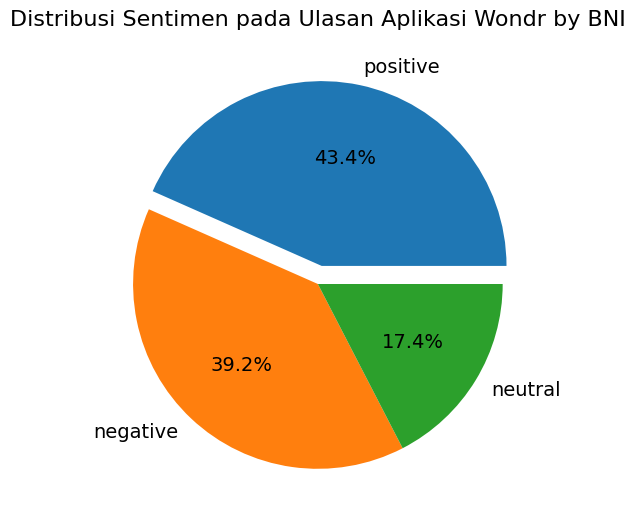

In [22]:
import matplotlib.pyplot as plt

# Membuat objek figure dan axis dengan ukuran 6x6 inci
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah masing-masing kategori sentimen dari ulasan aplikasi Wondr by BNI
sizes = [count for count in clean_df['polarity'].value_counts()]

# Mengambil label sentimen (positif, negatif, netral)
labels = list(clean_df['polarity'].value_counts().index)

# Menentukan potongan pie yang ditarik keluar (jika ada), diatur untuk penekanan visual
explode = (0.1, 0, 0) if len(labels) == 3 else (0.1, 0)  # menyesuaikan jika hanya 2 kategori

# Membuat pie chart untuk menggambarkan distribusi sentimen
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menambahkan judul visualisasi
ax.set_title('Distribusi Sentimen pada Ulasan Aplikasi Wondr by BNI', fontsize=16, pad=20)

# Menampilkan grafik pie
plt.show()

In [23]:
# Mengatur tampilan kolom agar dapat menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Menyaring ulasan dengan polaritas positif dari data ulasan Wondr by BNI
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih kolom yang relevan untuk analisis lebih lanjut
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan ulasan berdasarkan skor sentimen tertinggi
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks agar dimulai dari nol
positive_tweets = positive_tweets.reset_index(drop=True)

# Menggeser indeks agar dimulai dari 1
positive_tweets.index += 1

In [24]:
# Mengatur tampilan kolom agar dapat menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Menyaring ulasan dengan polaritas negatif dari data ulasan Wondr by BNI
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih kolom-kolom yang relevan untuk dianalisis
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan ulasan berdasarkan skor sentimen terendah
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Mengambil 10 ulasan dengan skor paling negatif
negative_tweets = negative_tweets[0:10]

# Mengatur ulang indeks agar dimulai dari nol
negative_tweets = negative_tweets.reset_index(drop=True)

# Mengatur indeks agar dimulai dari 1
negative_tweets.index += 1


In [25]:
# Mengatur tampilan kolom agar dapat menampilkan hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Menyaring ulasan dengan polaritas netral dari data ulasan Wondr by BNI
neutral_tweets = clean_df[clean_df['polarity'] == 'neutral']

# Memilih kolom-kolom yang relevan untuk analisis
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan ulasan berdasarkan skor sentimen (dapat disesuaikan jika ingin urutan tertentu)
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=False)

# Mengambil 10 ulasan netral teratas
neutral_tweets = neutral_tweets[0:10]

# Mengatur ulang indeks agar dimulai dari nol
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Mengatur indeks agar dimulai dari 1
neutral_tweets.index += 1

### Word Cloud dari Data Ulasan Aplikasi Wondr by BNI

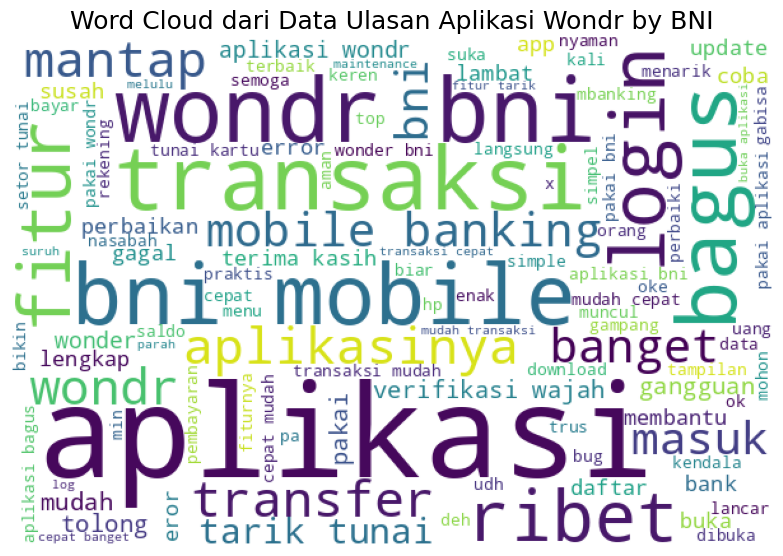

In [26]:
# Menginisialisasi string kosong untuk menggabungkan seluruh kata dari teks yang telah diproses
list_words = ''

# Melakukan iterasi terhadap setiap ulasan dalam kolom 'text_stopword' pada DataFrame
for tweet in clean_df['text_stopword']:
    # Melakukan iterasi terhadap setiap kata dalam satu ulasan
    for word in tweet:
        # Menambahkan kata ke dalam string 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan ukuran, warna latar, dan ukuran font minimum tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat area visualisasi untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul word cloud
ax.set_title('Word Cloud dari Data Ulasan Aplikasi Wondr by BNI', fontsize=18)

# Menonaktifkan tampilan grid pada visualisasi
ax.grid(False)

# Menampilkan hasil word cloud
ax.imshow(wordcloud)

# Mengatur tata letak agar rapi
fig.tight_layout(pad=0)

# Menyembunyikan sumbu koordinat
ax.axis('off')

# Menampilkan visualisasi word cloud
plt.show()

### Word Cloud Ulasan Positif Aplikasi Wondr by BNI

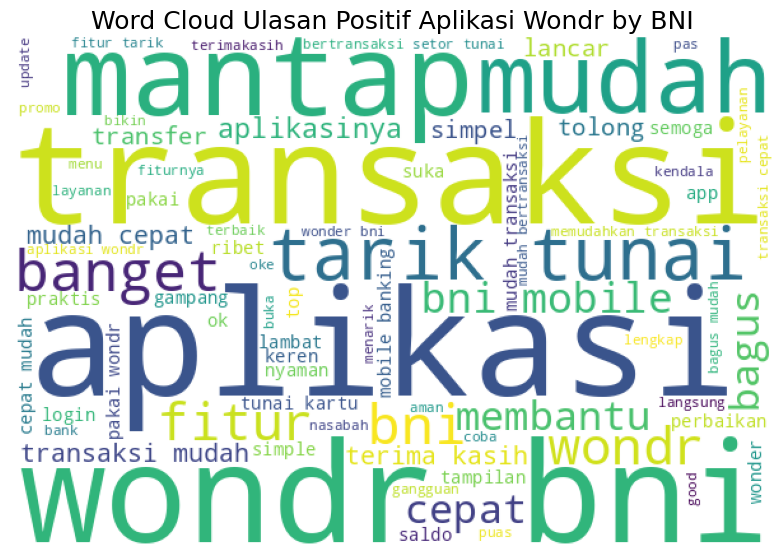

In [27]:
# Menginisialisasi string kosong untuk menampung seluruh kata dari ulasan positif yang telah dibersihkan
list_words = ''

# Melakukan iterasi terhadap setiap ulasan dalam kolom 'text_stopword' pada DataFrame 'positive_tweets'
for tweet in positive_tweets['text_stopword']:
    # Melakukan iterasi terhadap setiap kata dalam satu ulasan
    for word in tweet:
        # Menambahkan kata ke dalam string 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter visualisasi tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat area visualisasi untuk menampilkan Word Cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk Word Cloud berdasarkan ulasan dengan sentimen positif
ax.set_title('Word Cloud Ulasan Positif Aplikasi Wondr by BNI', fontsize=18)

# Menonaktifkan tampilan grid
ax.grid(False)

# Menampilkan Word Cloud pada area visualisasi
ax.imshow(wordcloud)

# Mengatur tata letak gambar agar lebih rapi
fig.tight_layout(pad=0)

# Menyembunyikan sumbu koordinat dari visualisasi
ax.axis('off')

# Menampilkan Word Cloud
plt.show()

### Word Cloud Ulasan Netral Aplikasi Wondr by BNI

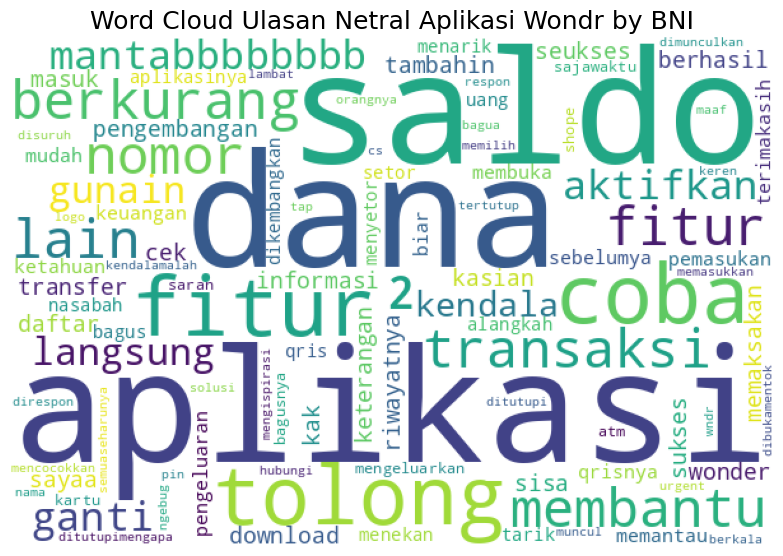

In [28]:
# Menginisialisasi string kosong untuk menampung seluruh kata dari ulasan positif yang telah dibersihkan
list_words = ''

# Melakukan iterasi terhadap setiap ulasan dalam kolom 'text_stopword' pada DataFrame 'neutral_tweets'
for tweet in neutral_tweets['text_stopword']:
    # Melakukan iterasi terhadap setiap kata dalam satu ulasan
    for word in tweet:
        # Menambahkan kata ke dalam string 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter visualisasi tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat area visualisasi untuk menampilkan Word Cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk Word Cloud berdasarkan ulasan dengan sentimen positif
ax.set_title('Word Cloud Ulasan Netral Aplikasi Wondr by BNI', fontsize=18)

# Menonaktifkan tampilan grid
ax.grid(False)

# Menampilkan Word Cloud pada area visualisasi
ax.imshow(wordcloud)

# Mengatur tata letak gambar agar lebih rapi
fig.tight_layout(pad=0)

# Menyembunyikan sumbu koordinat dari visualisasi
ax.axis('off')

# Menampilkan Word Cloud
plt.show()

### Word Cloud Ulasan Negatif Aplikasi Wondr by BNI

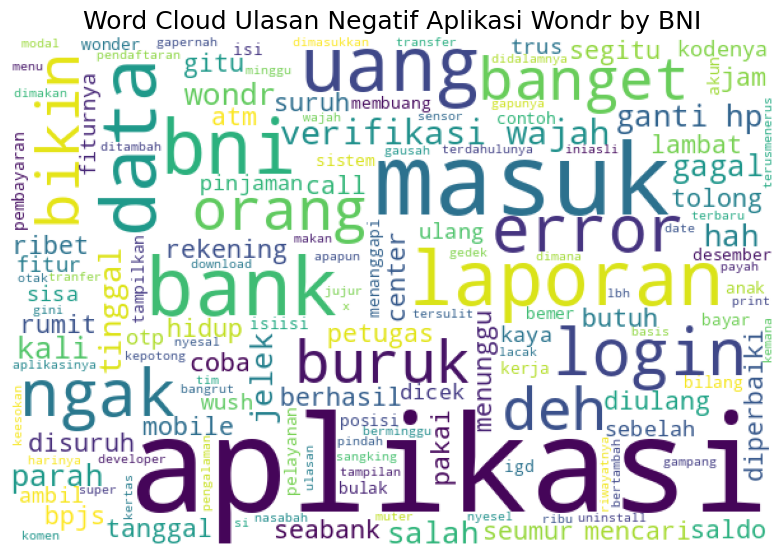

In [29]:
# Menginisialisasi string kosong untuk menampung seluruh kata dari ulasan negatif yang telah dibersihkan
list_words = ''

# Melakukan iterasi terhadap setiap ulasan dalam kolom 'text_stopword' pada DataFrame 'negative_tweets'
for tweet in negative_tweets['text_stopword']:
    # Melakukan iterasi terhadap setiap kata dalam satu ulasan
    for word in tweet:
        # Menambahkan kata ke dalam string 'list_words'
        list_words += ' ' + (word)

# Membuat objek WordCloud dengan parameter visualisasi tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat area visualisasi untuk menampilkan Word Cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk Word Cloud berdasarkan ulasan dengan sentimen negatif
ax.set_title('Word Cloud Ulasan Negatif Aplikasi Wondr by BNI', fontsize=18)

# Menonaktifkan tampilan grid
ax.grid(False)

# Menampilkan Word Cloud pada area visualisasi
ax.imshow(wordcloud)

# Mengatur tata letak gambar agar lebih rapi
fig.tight_layout(pad=0)

# Menyembunyikan sumbu koordinat dari visualisasi
ax.axis('off')

# Menampilkan Word Cloud
plt.show()

### Distribusi Kelas Sentimen Ulasan

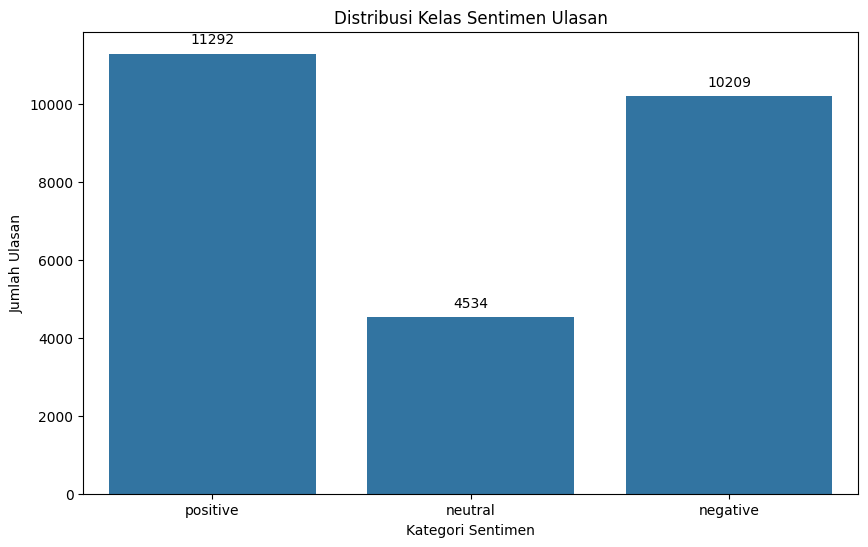

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualisasi distribusi kelas sentimen
plt.figure(figsize=(10, 6))
class_dist_plot = sns.countplot(x='polarity', data=clean_df, order=['positive', 'neutral', 'negative'])
plt.title('Distribusi Kelas Sentimen Ulasan')

# Menampilkan jumlah di atas setiap bar
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

### Distribusi Panjang Teks Ulasan Berdasarkan Sentimen

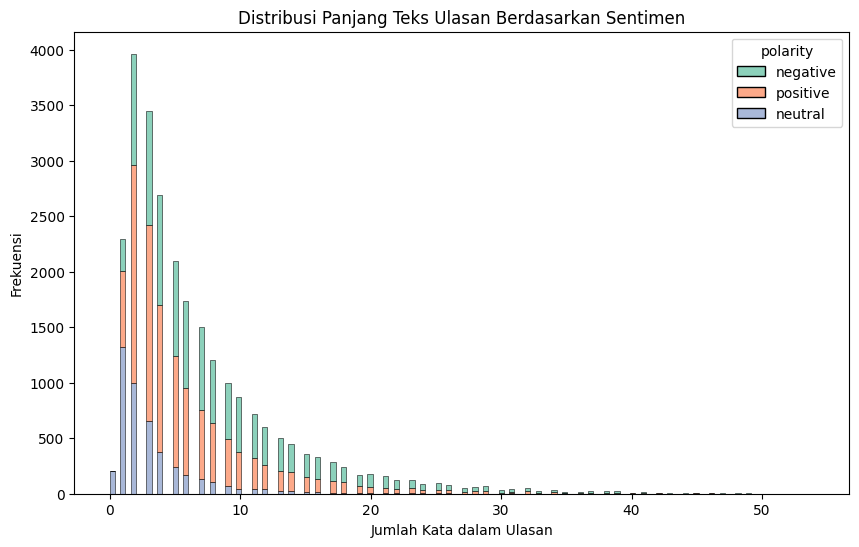

In [31]:
# Visualisasi distribusi panjang teks ulasan
plt.figure(figsize=(10, 6))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(data=clean_df, x='text_length', hue='polarity', multiple='stack', palette='Set2')
plt.title('Distribusi Panjang Teks Ulasan Berdasarkan Sentimen')
plt.xlabel('Jumlah Kata dalam Ulasan')
plt.ylabel('Frekuensi')
plt.show()

### 20 Kata yang Paling Sering Muncul dalam Ulasan

<ipython-input-32-a053d50fe5c6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='coolwarm')


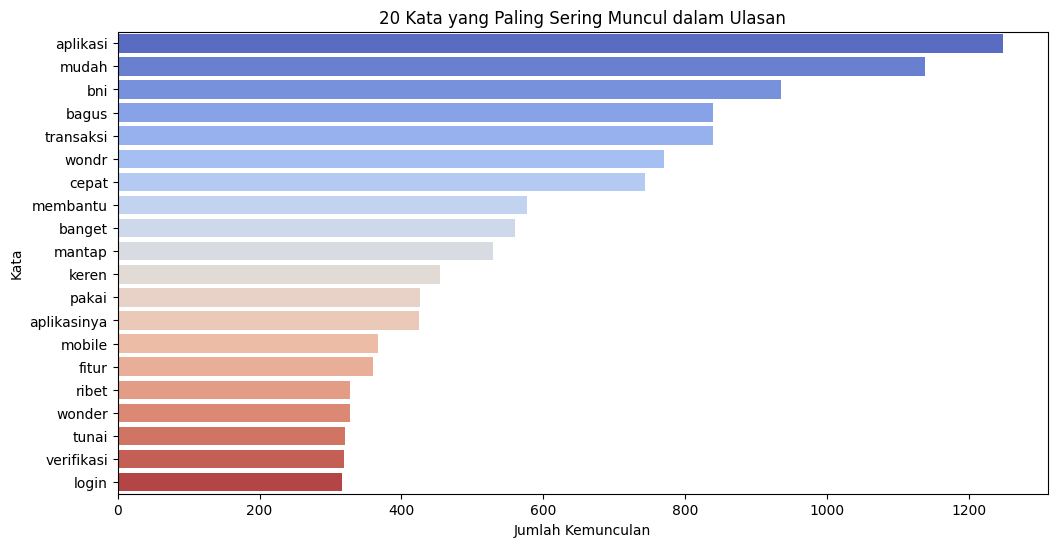

In [32]:
# Visualisasi kata-kata yang paling sering muncul
plt.figure(figsize=(12, 6))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df, palette='coolwarm')
plt.title('20 Kata yang Paling Sering Muncul dalam Ulasan')
plt.xlabel('Jumlah Kemunculan')
plt.ylabel('Kata')
plt.show()

In [33]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score

## **Data Splitting**

In [34]:
clean_df.head(2)

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,"mudah d pahami,dan registrasi ny jg gk ribet. Tapi dari segi tampilan desain pas di apk ny kurang menarik(monoton). juga sering benget terjadi kendala saat transaksi,mending pake apk BNI MOBILE",1,mudah d pahamidan registrasi ny jg gk ribet Tapi dari segi tampilan desain pas di apk ny kurang menarikmonoton juga sering benget terjadi kendala saat transaksimending pake apk BNI MOBILE,mudah d pahamidan registrasi ny jg gk ribet tapi dari segi tampilan desain pas di apk ny kurang menarikmonoton juga sering benget terjadi kendala saat transaksimending pake apk bni mobile,mudah di pahamidan registrasi nya juga gak ribet tapi dari segi tampilan desain pas di aplikasi nya kurang menarikmonoton juga sering benget terjadi kendala saat transaksimending pakai aplikasi bni mobile,"[mudah, di, pahamidan, registrasi, nya, juga, gak, ribet, tapi, dari, segi, tampilan, desain, pas, di, aplikasi, nya, kurang, menarikmonoton, juga, sering, benget, terjadi, kendala, saat, transaksimending, pakai, aplikasi, bni, mobile]","[mudah, pahamidan, registrasi, ribet, segi, tampilan, desain, pas, aplikasi, menarikmonoton, benget, kendala, transaksimending, pakai, aplikasi, bni, mobile]",mudah pahamidan registrasi ribet segi tampilan desain pas aplikasi menarikmonoton benget kendala transaksimending pakai aplikasi bni mobile,-5,negative,17
1,"Secara keseluruhan sdh oke. Hanya saja Tolong ditingkatkan aplikasinya untuk Debet Kredit saldo tidak terdeteksi. Muncul hanya Debet dan Kredit saja di Transaksi, sehingga saat ada transaksi Debet atau kredit saldo terakhir tidak terpampang, tidak muncul. Terimakasih",4,Secara keseluruhan sdh oke Hanya saja Tolong ditingkatkan aplikasinya untuk Debet Kredit saldo tidak terdeteksi Muncul hanya Debet dan Kredit saja di Transaksi sehingga saat ada transaksi Debet atau kredit saldo terakhir tidak terpampang tidak muncul Terimakasih,secara keseluruhan sdh oke hanya saja tolong ditingkatkan aplikasinya untuk debet kredit saldo tidak terdeteksi muncul hanya debet dan kredit saja di transaksi sehingga saat ada transaksi debet atau kredit saldo terakhir tidak terpampang tidak muncul terimakasih,secara keseluruhan sudah oke hanya saja tolong ditingkatkan aplikasinya untuk debet kredit saldo tidak terdeteksi muncul hanya debet dan kredit saja di transaksi sehingga saat ada transaksi debet atau kredit saldo terakhir tidak terpampang tidak muncul terimakasih,"[secara, keseluruhan, sudah, oke, hanya, saja, tolong, ditingkatkan, aplikasinya, untuk, debet, kredit, saldo, tidak, terdeteksi, muncul, hanya, debet, dan, kredit, saja, di, transaksi, sehingga, saat, ada, transaksi, debet, atau, kredit, saldo, terakhir, tidak, terpampang, tidak, muncul, terimakasih]","[oke, tolong, ditingkatkan, aplikasinya, debet, kredit, saldo, terdeteksi, muncul, debet, kredit, transaksi, transaksi, debet, kredit, saldo, terpampang, muncul, terimakasih]",oke tolong ditingkatkan aplikasinya debet kredit saldo terdeteksi muncul debet kredit transaksi transaksi debet kredit saldo terpampang muncul terimakasih,16,positive,19


## **Pemodelan**

#### Ektrasi Fitur dengan TF-IDF

In [35]:
X = clean_df['text_akhir']
y = clean_df['polarity']

In [36]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [37]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)
X_vectorized = vectorizer.fit_transform(X)

In [39]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,akses,akun,aman,aneh,apapun,aplikasi,aplikasinya,app,atm,bagus,...,tunggu,uang,udh,ulang,update,user,verifikasi,wajah,wonder,wondr
0,0.0,0.0,0.0,0.0,0.0,0.347275,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.213049,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.21627,0.466255,0.0,0.163767
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.203405,0.0,0.0,0.00000,0.000000,0.0,0.118326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26030,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
26031,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
26032,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000
26033,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000


In [40]:
model_train_accuracy = pd.DataFrame(columns=['Accuracy'])
model_test_accuracy = pd.DataFrame(columns=['Accuracy'])

### **A. Naive Bayes**

##### Naive Bayes 80/20

In [41]:
# Split data: 80% train, 20% test
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Model Naive Bayes
naive_bayes_80 = BernoulliNB()
naive_bayes_80.fit(X_train_80, y_train_80)

# Prediksi
y_pred_train_80 = naive_bayes_80.predict(X_train_80)
y_pred_test_20 = naive_bayes_80.predict(X_test_20)

# Evaluasi
accuracy_train_80 = accuracy_score(y_pred_train_80, y_train_80)
accuracy_test_20 = accuracy_score(y_pred_test_20, y_test_20)

# Simpan hasil ke DataFrame
model_train_accuracy.loc['Naive Bayes (Train 80%)'] = accuracy_train_80
model_test_accuracy.loc['Naive Bayes (Test 20%)'] = accuracy_test_20

# Output
print('Naive Bayes (80% train) - accuracy_train:', accuracy_train_80)
print('Naive Bayes (20% test) - accuracy_test:', accuracy_test_20)

Naive Bayes (80% train) - accuracy_train: 0.7697330516612253
Naive Bayes (20% test) - accuracy_test: 0.7368926445169963


##### Naive Bayes 70/30

In [42]:
# Split data: 70% train, 30% test
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Model Naive Bayes
naive_bayes_70 = BernoulliNB()
naive_bayes_70.fit(X_train_70, y_train_70)

# Prediksi
y_pred_train_70 = naive_bayes_70.predict(X_train_70)
y_pred_test_30 = naive_bayes_70.predict(X_test_30)

# Evaluasi
accuracy_train_70 = accuracy_score(y_pred_train_70, y_train_70)
accuracy_test_30 = accuracy_score(y_pred_test_30, y_test_30)

# Simpan hasil ke DataFrame
model_train_accuracy.loc['Naive Bayes (Train 70%)'] = accuracy_train_70
model_test_accuracy.loc['Naive Bayes (Test 30%)'] = accuracy_test_30

# Output
print('Naive Bayes (70% train) - accuracy_train:', accuracy_train_70)
print('Naive Bayes (30% test) - accuracy_test:', accuracy_test_30)

Naive Bayes (70% train) - accuracy_train: 0.7597673397717296
Naive Bayes (30% test) - accuracy_test: 0.7100243246703367


### **B. Random Forest**

##### Random Forest 80/20

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Model Random Forest
random_forest_80 = RandomForestClassifier()
random_forest_80.fit(X_train_80, y_train_80)

# Prediksi
y_pred_train_rf_80 = random_forest_80.predict(X_train_80)
y_pred_test_rf_20 = random_forest_80.predict(X_test_20)

# Evaluasi
accuracy_train_rf_80 = accuracy_score(y_pred_train_rf_80, y_train_80)
accuracy_test_rf_20 = accuracy_score(y_pred_test_rf_20, y_test_20)

# Simpan hasil ke DataFrame
model_train_accuracy.loc['Random Forest (Train 80%)'] = accuracy_train_rf_80
model_test_accuracy.loc['Random Forest (Test 20%)'] = accuracy_test_rf_20

# Output
print('Random Forest 80% - accuracy_train:', accuracy_train_rf_80)
print('Random Forest 20% - accuracy_test:', accuracy_test_rf_20)

Random Forest 80% - accuracy_train: 0.9999039754177069
Random Forest 20% - accuracy_test: 0.8776646821586326


##### Random Forest 70/30

In [44]:
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Prediksi
y_pred_train_rf = random_forest.predict(X_train)
y_pred_test_rf = random_forest.predict(X_test)

# Evaluasi
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

# Simpan hasil ke DataFrame
model_train_accuracy.loc['Random Forest (Train 70%)'] = accuracy_train_rf
model_test_accuracy.loc['Random Forest (Test 30%)'] = accuracy_test_rf

# Output
print('Random Forest (70% train) - accuracy_train:', accuracy_train_rf)
print('Random Forest (30% test) - accuracy_test:', accuracy_test_rf)

Random Forest (70% train) - accuracy_train: 1.0
Random Forest (30% test) - accuracy_test: 0.8759441812828063


### **C. Logistic Regression**

##### Logistic Regression 80/20

In [45]:
from sklearn.linear_model import LogisticRegression

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Prediksi
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Simpan hasil ke DataFrame
model_train_accuracy.loc['LogReg (Train 80%)'] = accuracy_train_lr
model_test_accuracy.loc['LogReg (Test 20%)'] = accuracy_test_lr

# Output
print('Logistic Regression (80% train) - accuracy_train:', accuracy_train_lr)
print('Logistic Regression (20% test) - accuracy_test:', accuracy_test_lr)

Logistic Regression (80% train) - accuracy_train: 0.964086806222393
Logistic Regression (20% test) - accuracy_test: 0.9099289418091031


##### Logistic Regression 70/30

In [46]:
# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Model Logistic Regression
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train, y_train)

# Prediksi
y_pred_train_lr = logistic_regression.predict(X_train)
y_pred_test_lr = logistic_regression.predict(X_test)

# Evaluasi
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Simpan hasil ke DataFrame
model_train_accuracy.loc['LogReg (Train 70%)'] = accuracy_train_lr
model_test_accuracy.loc['LogReg (Test 30%)'] = accuracy_test_lr

# Output
print('Logistic Regression (70% train) - accuracy_train:', accuracy_train_lr)
print('Logistic Regression (30% test) - accuracy_test:', accuracy_test_lr)

Logistic Regression (70% train) - accuracy_train: 0.965649692712906
Logistic Regression (30% test) - accuracy_test: 0.9075662527205224


### **D. Decision Tree**

##### Decision Tree 80/20

In [47]:
from sklearn.tree import DecisionTreeClassifier

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Prediksi
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)

# Evaluasi
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Simpan ke DataFrame
model_train_accuracy.loc['Decision Tree (Train 80%)'] = accuracy_train_dt
model_test_accuracy.loc['Decision Tree (Test 20%)'] = accuracy_test_dt

# Output
print('Decision Tree (80% train) - accuracy_train:', accuracy_train_dt)
print('Decision Tree (20% test) - accuracy_test:', accuracy_test_dt)

Decision Tree (80% train) - accuracy_train: 0.9999519877088535
Decision Tree (20% test) - accuracy_test: 0.8632609948146726


##### Decision Tree 70/30

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Split data: 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Prediksi
y_pred_train_dt = decision_tree.predict(X_train)
y_pred_test_dt = decision_tree.predict(X_test)

# Evaluasi
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Simpan ke DataFrame
model_train_accuracy.loc['Decision Tree (Train 70%)'] = accuracy_train_dt
model_test_accuracy.loc['Decision Tree (Test 30%)'] = accuracy_test_dt

# Output
print('Decision Tree (70% train) - accuracy_train:', accuracy_train_dt)
print('Decision Tree (30% test) - accuracy_test:', accuracy_test_dt)

Decision Tree (70% train) - accuracy_train: 1.0
Decision Tree (30% test) - accuracy_test: 0.8568685187556011


### **Model Evaluation**

In [49]:
model_train_accuracy

,Accuracy
Naive Bayes (Train 80%),0.769733
Naive Bayes (Train 70%),0.759767
Random Forest (Train 80%),0.999904
Random Forest (Train 70%),1.000000
LogReg (Train 80%),0.964087
LogReg (Train 70%),0.965650
Decision Tree (Train 80%),0.999952
Decision Tree (Train 70%),1.000000


In [50]:
model_test_accuracy

,Accuracy
Naive Bayes (Test 20%),0.736893
Naive Bayes (Test 30%),0.710024
Random Forest (Test 20%),0.877665
Random Forest (Test 30%),0.875944
LogReg (Test 20%),0.909929
LogReg (Test 30%),0.907566
Decision Tree (Test 20%),0.863261
Decision Tree (Test 30%),0.856869


In [51]:
model_test_accuracy.columns = ['Accuracy Test']
accuracy_test_only = model_test_accuracy.copy()
accuracy_test_sorted = accuracy_test_only.sort_values(by='Accuracy Test', ascending=False)
print(accuracy_test_sorted)

                          Accuracy Test
LogReg (Test 20%)              0.909929
LogReg (Test 30%)              0.907566
Random Forest (Test 20%)       0.877665
Random Forest (Test 30%)       0.875944
Decision Tree (Test 20%)       0.863261
Decision Tree (Test 30%)       0.856869
Naive Bayes (Test 20%)         0.736893
Naive Bayes (Test 30%)         0.710024


Dalam kasus Sentiment Analysis ini, algoritma Logistic Regression mencapai akurasi tertinggi sebesar 91%. Dan algoritma Naive Bayes mencapai akurasi terendah sebesar 71%.

In [52]:
def predict_sentiment(text):
    # 1. Preprocessing
    cleaned = cleaningText(text)
    folded = casefoldingText(cleaned)
    fixed = normalize_slang(folded)
    tokens = tokenizingText(fixed)
    filtered = filteringText(tokens)
    sentence = toSentence(filtered)

    # 2. Vektorisasi
    vectorized = vectorizer.transform([sentence])

    # 3. Prediksi
    pred_probs = logistic_regression.predict_proba(vectorized)[0]

    # 4. Interpretasi
    labels = logistic_regression.classes_  # ['negative', 'neutral', 'positive']
    label_dict = dict(zip(labels, pred_probs))
    predicted_label = max(label_dict, key=label_dict.get)

    # 5. Print hasil
    print(f"\nUlasan: {text}")
    print("Probabilitas:", label_dict)
    print("Prediksi Sentimen:", predicted_label)

    return predicted_label

In [53]:
predict_sentiment(input("Masukkan kalimat baru: "))
predict_sentiment(input("Masukkan kalimat baru: "))

Masukkan kalimat baru: aplikasinya bagus, lancar, tampilannya juga enak diliat

Ulasan: aplikasinya bagus, lancar, tampilannya juga enak diliat
Probabilitas: {'negative': np.float64(0.1568352200136241), 'neutral': np.float64(0.02548396554580857), 'positive': np.float64(0.8176808144405674)}
Prediksi Sentimen: positive
Masukkan kalimat baru: buang buang memori, mending pakai aplikasi lama aja

Ulasan: buang buang memori, mending pakai aplikasi lama aja
Probabilitas: {'negative': np.float64(0.9627476583676703), 'neutral': np.float64(0.03692598407421365), 'positive': np.float64(0.000326357558116193)}
Prediksi Sentimen: negative


'negative'